In [337]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
dataset=pd.read_csv("Q04_Wholesale+customers+data.csv")
dataset1=dataset


In [339]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [340]:
dataset.shape

(440, 8)

In [341]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [342]:
dataset.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# EDA

# Description of dataset

1) FRESH: annual spending on fresh products (Continuous); 
2) MILK: annual spending on milk products (Continuous); 
3) GROCERY: annual spending on grocery products (Continuous); 
4) FROZEN: annual spending on frozen products (Continuous) 
5) DETERGENTS_PAPER: annual spending on detergents and paper products (Continuous) 
6) DELICATESSEN: annual spending on and delicatessen products (Continuous); 
7) CHANNEL: customer Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
8) REGION: customer Region Lisnon, Oporto or Other (Nominal) 

here I converted the channel and Region to categorical variable for only EDA purpose 
1-Horeca 2-Retail_channel
1-lisnon 2-Oporto 3-Other
The conversion follows alphabetical order

# Univarient Analysis

In [343]:
dataset['Channel'].replace([1,2],['Horeca','Retail_channel'],inplace=True)

In [344]:
dataset['Region'].replace([1,2,3],['Lisnon','Oporto','Other'],inplace=True)

In [345]:
for i in dataset.columns:
    if dataset[i].dtype!='object':
        print(i)

Fresh
Milk
Grocery
Frozen
Detergents_Paper
Delicassen


In [346]:
for i in dataset.columns:
    if dataset[i].dtype=='object':
        print(i)

Channel
Region


In [347]:
def continous_data(i):
    if dataset[i].dtype!='object':
        print('--'*500)
        sns.boxplot(dataset[i])
        plt.title("Boxplot---"+str(i))
        plt.show()
        plt.title("histogram---"+str(i))
        sns.set()
        dataset[i].plot.hist()
        plt.show()
        plt.clf()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

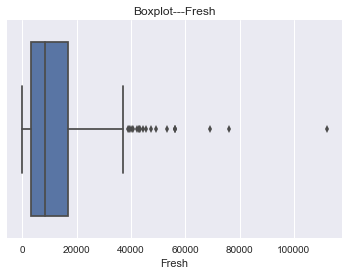

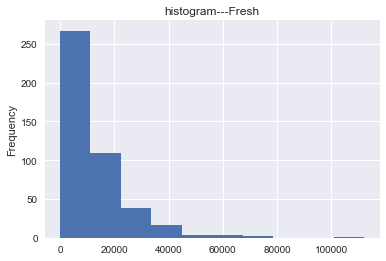

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

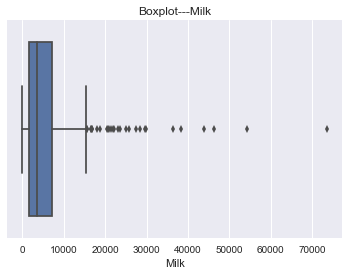

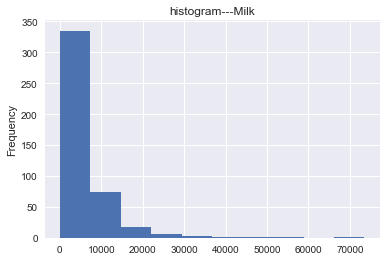

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

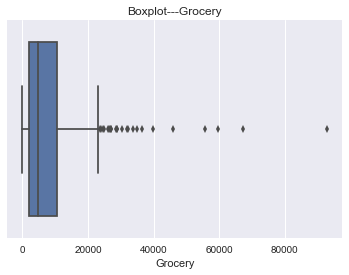

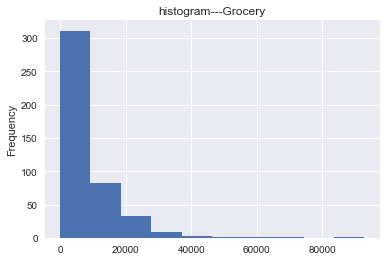

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

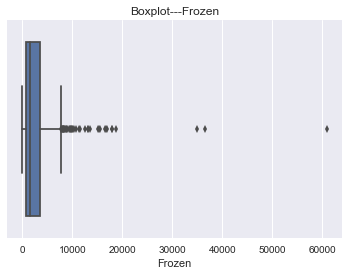

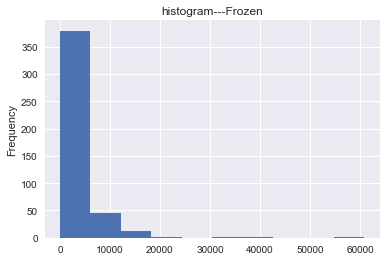

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

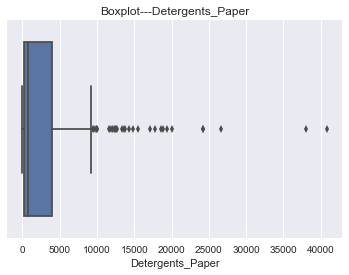

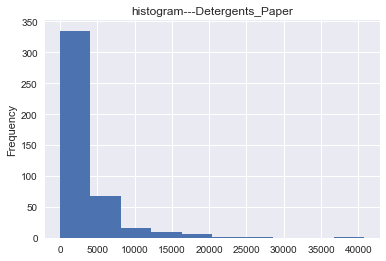

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

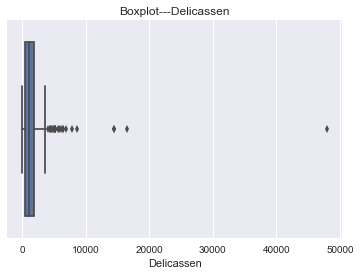

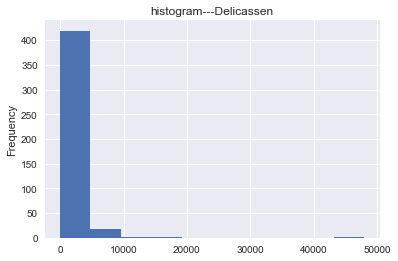

In [348]:
j=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for k in j:
    continous_data(i=k)

In [349]:
def categorical_data(i):
    dataset[i].value_counts().plot(kind='bar')

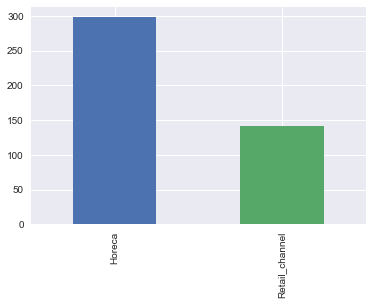

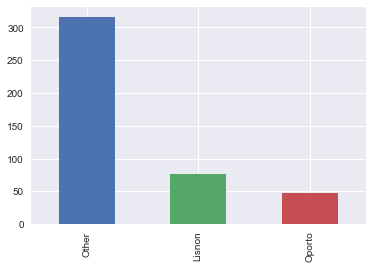

In [350]:
j_1=['Channel','Region']
for k in j_1:
    categorical_data(i=k)
    plt.show()

# Multivarient Analysis

In [351]:
correlation=dataset.corr()
correlation

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [352]:
correlation[abs(correlation)>0.60]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.0,NaN,NaN,NaN,NaN,NaN
Milk,NaN,1.000000,0.728335,NaN,0.661816,NaN
Grocery,NaN,0.728335,1.000000,NaN,0.924641,NaN
Frozen,NaN,NaN,NaN,1.0,NaN,NaN
Detergents_Paper,NaN,0.661816,0.924641,NaN,1.000000,NaN
Delicassen,NaN,NaN,NaN,NaN,NaN,1.0


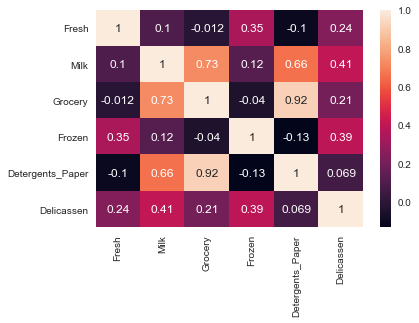

In [353]:
sns.heatmap(dataset.corr(), annot=True)

Plotting those variables which create multicollinearity when I consider correlation>0.60

In [354]:
def scatterplot(i,j):
    sns.regplot(data=dataset,x=i,y=j)
    plt.show()

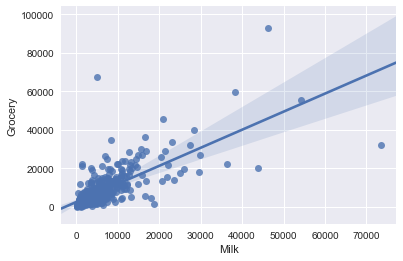

In [355]:
scatterplot(i='Milk',j='Grocery')

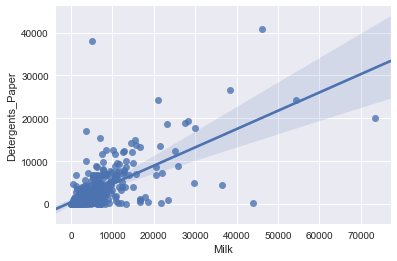

In [356]:
scatterplot(i='Milk',j='Detergents_Paper')

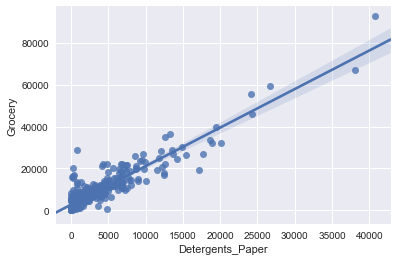

In [357]:
scatterplot(i='Detergents_Paper',j='Grocery')

In [358]:
def categorical_multi(i,j):
    pd.crosstab(dataset[i],dataset[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(dataset[i],dataset[j]))

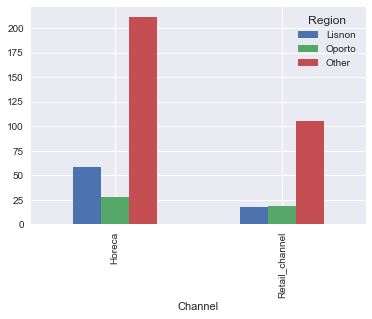

Region          Lisnon  Oporto  Other
Channel                              
Horeca              59      28    211
Retail_channel      18      19    105


In [359]:
categorical_multi(i='Channel',j='Region')

# Treatment of Outliers

In [360]:
j=[]
for i in dataset.columns:
    if dataset[i].dtype!='object':
        j.append(i)

In [361]:
j

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# replacing the outliers with their Inner fences 

In [362]:
for k in j:
    IQR=np.percentile(dataset[k],75)-np.percentile(dataset[k],25)
    Outlier_top=np.percentile(dataset[i],75)+1.5*IQR
    Outlier_bottom=np.percentile(dataset[k],25)-1.5*IQR
    dataset[k]=np.where(dataset[k] >Outlier_top,Outlier_top,dataset[k])
    dataset[k]=np.where(dataset[k]<Outlier_bottom,Outlier_bottom,dataset[k])

In [363]:
def continous_data(i):
    if dataset[i].dtype!='object':
        print('--'*500)
        sns.boxplot(dataset[i])
        plt.title("Boxplot---"+str(i))
        plt.show()
        plt.title("histogram---"+str(i))
        sns.set()
        dataset[i].plot.kde()
        plt.show()
        plt.clf()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

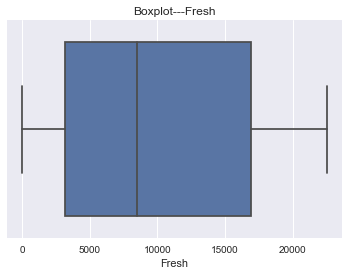

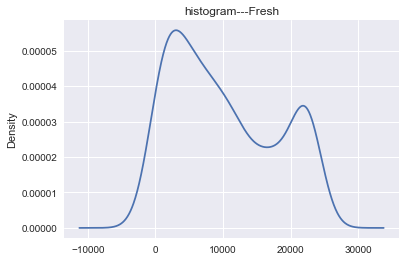

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

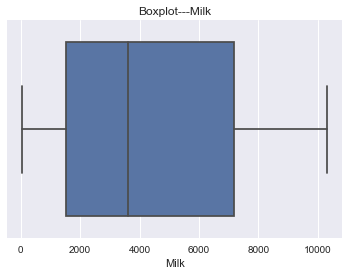

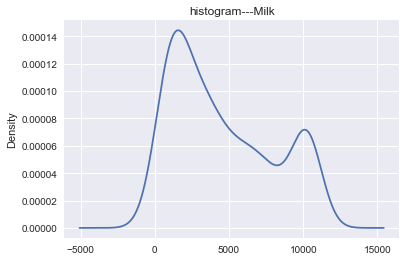

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

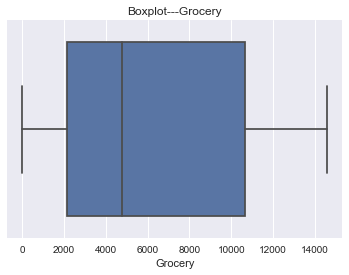

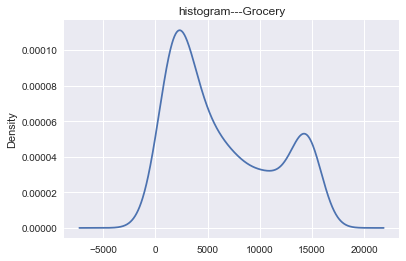

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

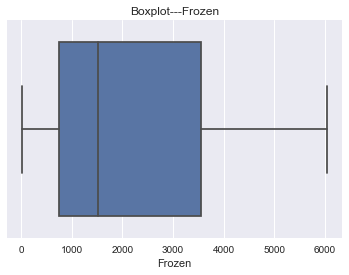

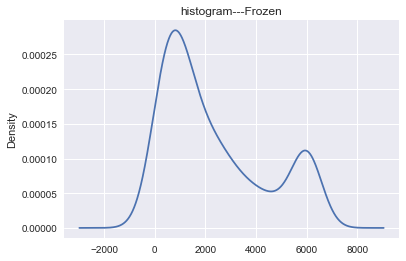

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

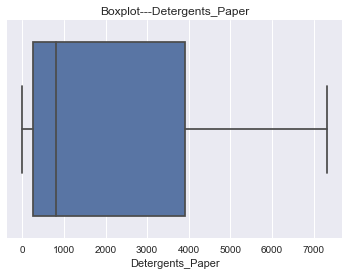

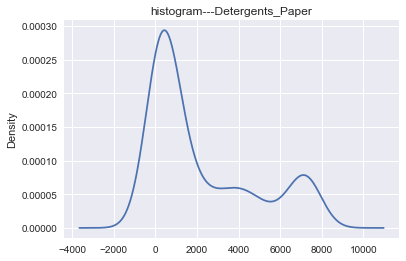

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

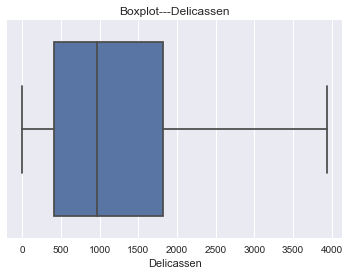

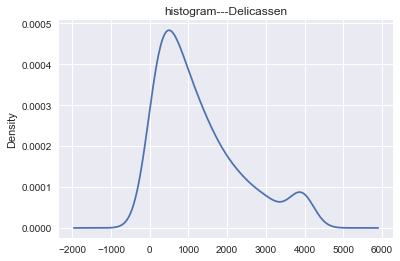

In [364]:
for k in j:
    continous_data(i=k)

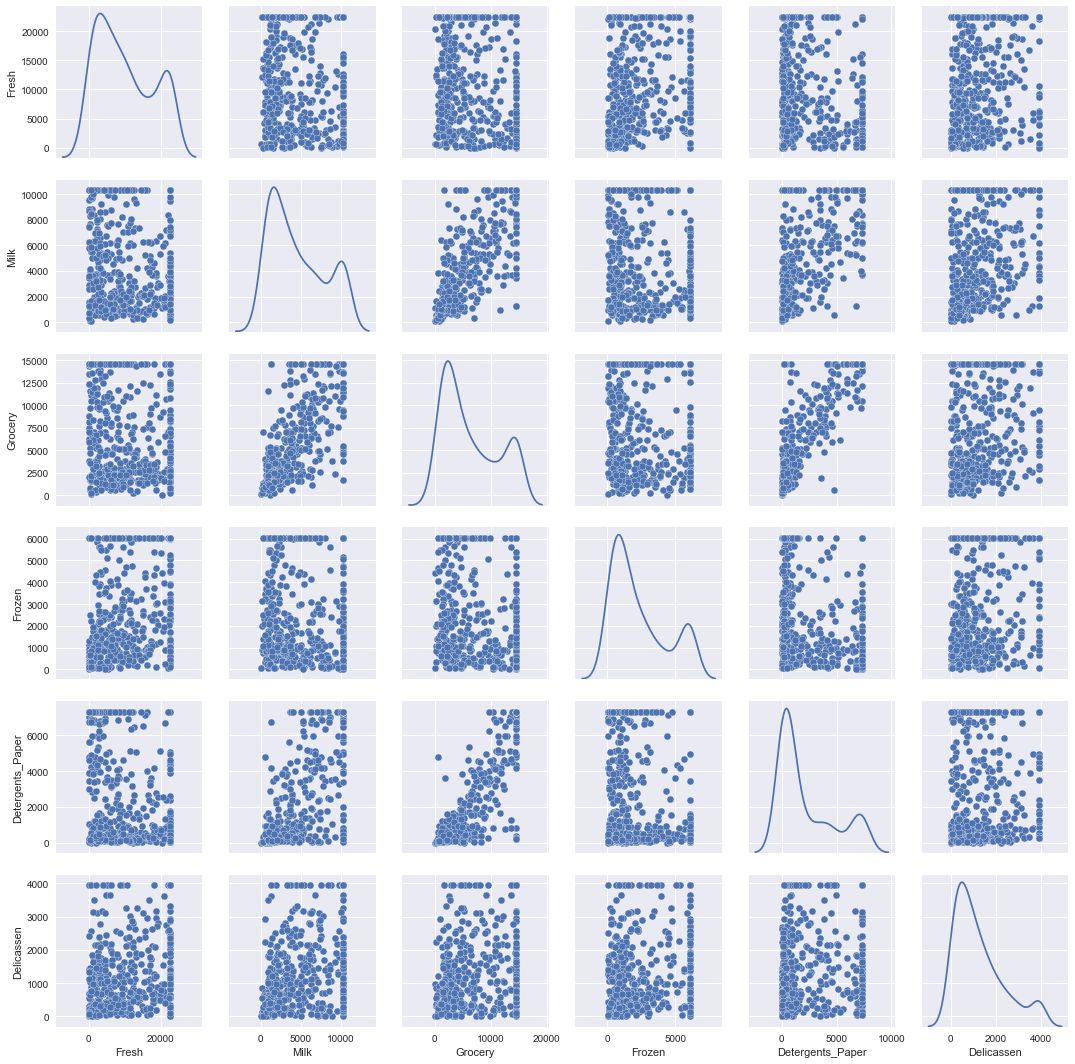

In [365]:
sns.pairplot(dataset,diag_kind = 'kde')

# replacing with median to treat the outliers 

In [366]:
for k in j:
    IQR=np.percentile(dataset1[k],75)-np.percentile(dataset1[k],25)
    Outlier_top=np.percentile(dataset1[i],75)+1.5*IQR
    Outlier_bottom=np.percentile(dataset1[k],25)-1.5*IQR
    dataset[k]=np.where(dataset[k] >Outlier_top,np.percentile(dataset1[k],50),dataset1[k])
    dataset[k]=np.where(dataset[k]<Outlier_bottom,np.percentile(dataset1[k],50),dataset1[k])

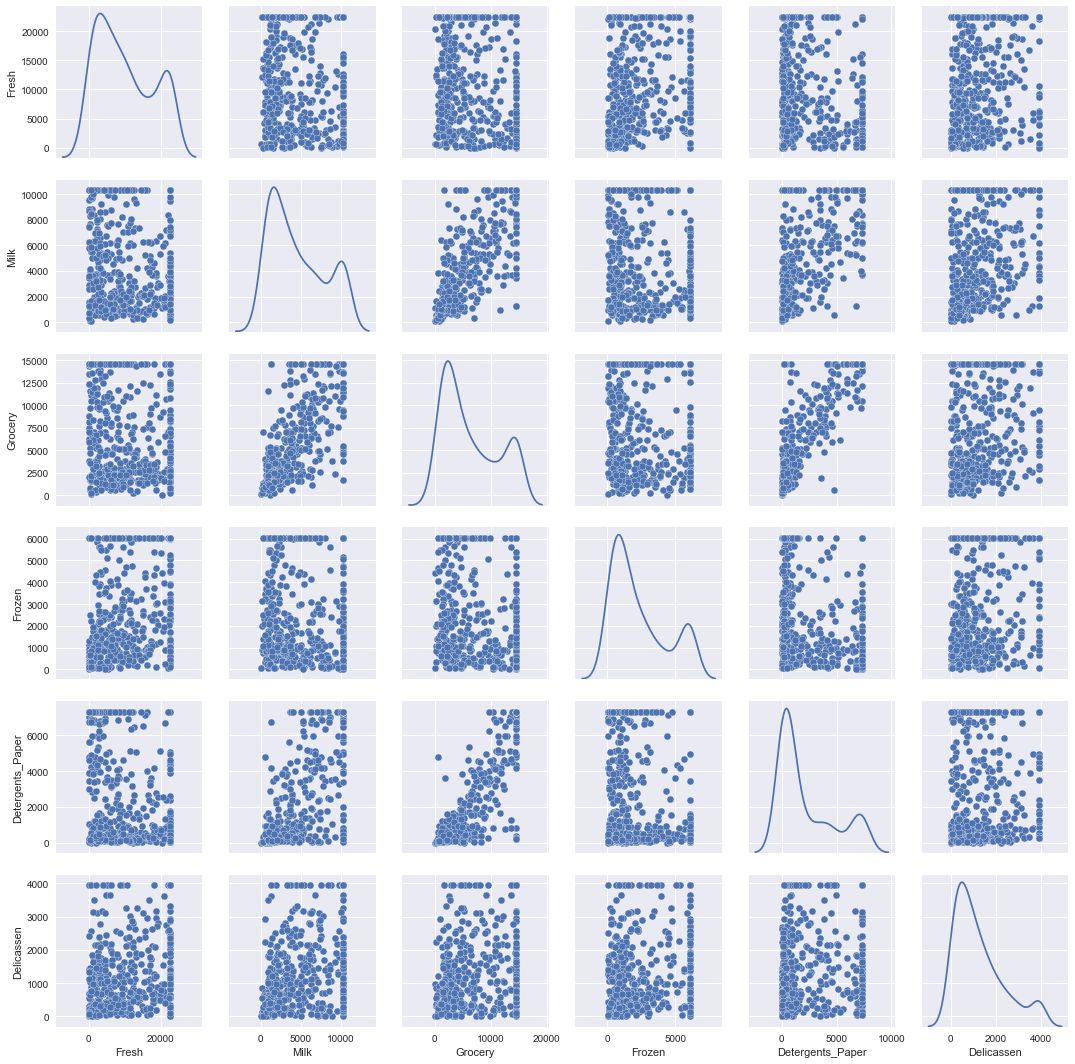

In [367]:
sns.pairplot(dataset,diag_kind = 'kde')

Going with replace the Inner Fences for those variables having the outliers

# Creating dummies for categorical varibles

In [368]:
channell = pd.get_dummies(dataset['Channel'],prefix='Channel',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,channell],axis=1)

In [369]:
Regionn = pd.get_dummies(dataset['Region'],prefix='Region',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,Regionn],axis=1)

In [370]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Retail_channel,Region_Oporto,Region_Other
0,Retail_channel,Other,12669.00,9656.0,7561.0,214.00,2674.0,1338.00,1,0,1
1,Retail_channel,Other,7057.00,9810.0,9568.0,1762.00,3293.0,1776.00,1,0,1
2,Retail_channel,Other,6353.00,8808.0,7684.0,2405.00,3516.0,3938.25,1,0,1
3,Horeca,Other,13265.00,1196.0,4221.0,6038.25,507.0,1788.00,0,0,1
4,Retail_channel,Other,22529.25,5410.0,7198.0,3915.00,1777.0,3938.25,1,0,1


In [371]:
dataset.drop(['Channel','Region'],axis=1,inplace=True)

In [372]:
dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Retail_channel,Region_Oporto,Region_Other
0,12669.00,9656.0,7561.0,214.00,2674.0,1338.00,1,0,1
1,7057.00,9810.0,9568.0,1762.00,3293.0,1776.00,1,0,1
2,6353.00,8808.0,7684.0,2405.00,3516.0,3938.25,1,0,1
3,13265.00,1196.0,4221.0,6038.25,507.0,1788.00,0,0,1
4,22529.25,5410.0,7198.0,3915.00,1777.0,3938.25,1,0,1


In [373]:
dataset2=dataset

# 3) Feature Scaling

In [374]:
from sklearn.preprocessing import MinMaxScaler

In [375]:
min_max_scaler=MinMaxScaler()

In [376]:
dataset=min_max_scaler.fit_transform(dataset)

c:\users\hp 8.1\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [377]:
dataset=pd.DataFrame(dataset)

In [378]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,0.562277,0.936580,0.518688,0.031431,0.365134,0.339241,1.0,0.0,1.0
1,0.313146,0.951603,0.656424,0.288862,0.449753,0.450543,1.0,0.0,1.0
2,0.281893,0.853858,0.527129,0.395793,0.480238,1.000000,1.0,0.0,1.0
3,0.588735,0.111305,0.289472,1.000000,0.068898,0.453593,0.0,0.0,1.0
4,1.000000,0.522382,0.493776,0.646905,0.242511,1.000000,1.0,0.0,1.0


# 4) PCA

In [406]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(dataset)
a=pca.explained_variance_ratio_.cumsum()
print(a*100)

[ 41.13875437  62.15788013  76.09258688  82.84971649  88.25007454
  92.78968625  96.54100844  98.90026411 100.        ]


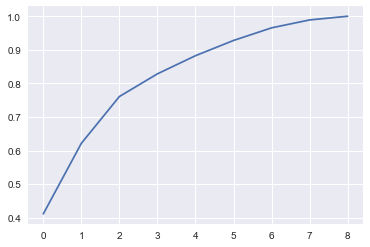

In [407]:
plt.plot(a)

Considering n_components as 5 i.e.., we reduced the dimensions of 8 to 5 
PCA lines are also called as Linear Combination of variables 
Each lines contains all the variables with different proporations and their range lies between [0,1] because the scaling I used is MinMaxScaler
These proportions are called Singular Vector or Eigen values of Each PCA line

In [408]:
pca=PCA(n_components=5)
pca_lines=pca.fit_transform(dataset)
print(pca_lines)

[[ 0.72378672 -0.32293679 -0.03969261 -0.31613871  0.088306  ]
 [ 0.83361184 -0.30141213  0.02691736  0.02763122 -0.02801851]
 [ 0.79559246 -0.31769542  0.26975652  0.16533477  0.09466891]
 ...
 [ 1.25468557 -0.31484594  0.15396897 -0.23572845  0.18157369]
 [-0.49983447 -0.31399201 -0.12803336 -0.07748415  0.22447571]
 [-0.46899217 -0.26952869 -0.66326739 -0.01794115  0.04238795]]


# 5) Do K means clustering 
# K-means Clustering

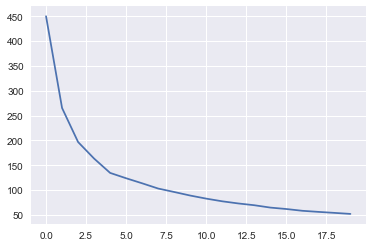

In [409]:
from sklearn.cluster import KMeans
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_lines)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

By looking over the elbow curve we come to know n_clusters=7

In [410]:
model_clus = KMeans(n_clusters = 7, max_iter=50)
model_clus.fit(pca_lines)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [411]:
model_clus.labels_

array([6, 2, 6, 0, 6, 6, 6, 6, 5, 2, 2, 6, 6, 6, 6, 5, 2, 5, 6, 5, 6, 5,
       0, 6, 6, 6, 5, 4, 2, 4, 4, 5, 4, 0, 5, 2, 4, 6, 2, 0, 0, 4, 2, 2,
       2, 2, 2, 6, 6, 2, 5, 5, 6, 2, 4, 5, 2, 2, 4, 5, 6, 6, 6, 2, 5, 2,
       5, 6, 0, 5, 0, 0, 0, 6, 6, 4, 0, 2, 5, 5, 5, 2, 6, 4, 6, 6, 6, 0,
       0, 0, 4, 0, 2, 0, 2, 5, 2, 5, 5, 0, 6, 2, 2, 0, 4, 4, 2, 2, 2, 2,
       4, 2, 0, 4, 4, 4, 5, 5, 0, 5, 4, 5, 4, 6, 0, 0, 0, 6, 5, 4, 0, 5,
       4, 5, 5, 5, 0, 5, 4, 5, 4, 4, 4, 0, 4, 6, 5, 5, 5, 4, 4, 5, 4, 5,
       5, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 6, 2, 5, 5, 5, 2, 2, 5, 2, 5, 2,
       0, 4, 5, 0, 4, 0, 2, 0, 5, 5, 5, 0, 2, 2, 0, 4, 5, 2, 5, 0, 0, 3,
       1, 1, 3, 3, 0, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       3, 0, 3, 1, 3, 1, 1, 1, 1, 0, 5, 5, 0, 0, 0, 6, 5, 6, 0, 0, 0, 4,
       5, 0, 4, 4, 5, 5, 5, 3, 1, 3, 1, 3, 3, 1, 3,

In [412]:
dataset_for_final_combination=pd.read_csv("Q04_Wholesale+customers+data.csv")

In [413]:
dataset_final=pd.concat([dataset_for_final_combination,pd.Series(model_clus.labels_)],axis=1)

In [414]:
dataset_final = dataset_final.rename(columns={0: 'ClusterID'})

In [415]:
dataset_final.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ClusterID
0,2,3,12669,9656,7561,214,2674,1338,6
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,6
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,6


# 6) Explain what you have done and how this segments customers 

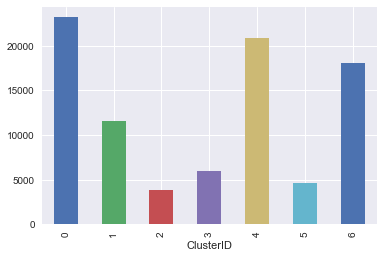

In [416]:
dataset_final.groupby('ClusterID').Fresh.mean().plot(kind='bar')

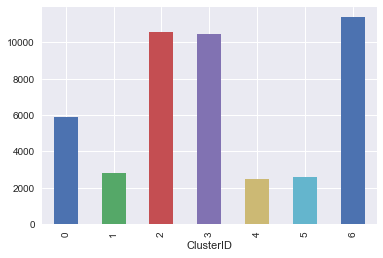

In [417]:
dataset_final.groupby('ClusterID').Milk.mean().plot(kind='bar')

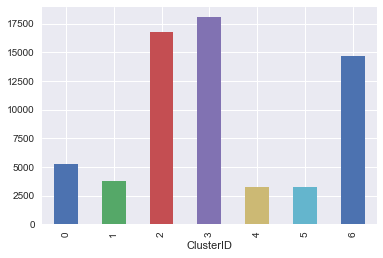

In [418]:
dataset_final.groupby('ClusterID').Grocery.mean().plot(kind='bar')

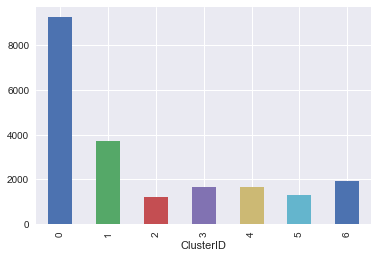

In [419]:
dataset_final.groupby('ClusterID').Frozen.mean().plot(kind='bar')

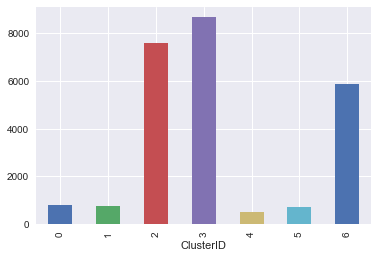

In [420]:
dataset_final.groupby('ClusterID').Detergents_Paper.mean().plot(kind='bar')

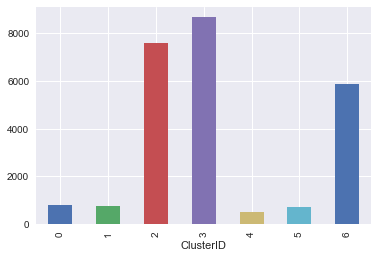

In [421]:
dataset_final.groupby('ClusterID').Detergents_Paper.mean().plot(kind='bar')

# By not considering the region and channel

In [395]:
dataset2.drop(['Channel_Retail_channel','Region_Oporto','Region_Other'],axis=1,inplace=True)

In [396]:
from sklearn.preprocessing import MinMaxScaler

In [397]:
min_max_scaler=MinMaxScaler()

In [398]:
dataset2=min_max_scaler.fit_transform(dataset2)

In [399]:
dataset2=pd.DataFrame(dataset2)
dataset2.head()

,0,1,2,3,4,5
0,0.562277,0.936580,0.518688,0.031431,0.365134,0.339241
1,0.313146,0.951603,0.656424,0.288862,0.449753,0.450543
2,0.281893,0.853858,0.527129,0.395793,0.480238,1.000000
3,0.588735,0.111305,0.289472,1.000000,0.068898,0.453593
4,1.000000,0.522382,0.493776,0.646905,0.242511,1.000000


In [400]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(dataset2)
a=pca.explained_variance_ratio_.cumsum()
print(a*100)

[ 48.29252277  73.45193646  85.03948486  93.12788301  97.88291475
 100.        ]


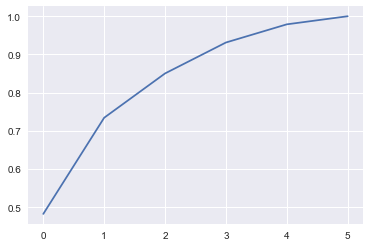

In [401]:
plt.plot(a)

In [402]:
pca=PCA(n_components=4)
pca_lines=pca.fit_transform(dataset2)
print(pca_lines)

[[ 0.38154433 -0.01856259 -0.31426257  0.08828311]
 [ 0.5293706   0.04504153  0.04236384  0.12774484]
 [ 0.48769069  0.2882869   0.1568845   0.57336129]
 ...
 [ 1.05153391  0.17400269 -0.35276483 -0.08450001]
 [-0.38332047 -0.1076004  -0.15164338  0.35763476]
 [-0.34643618 -0.64538021 -0.05012025  0.0385155 ]]


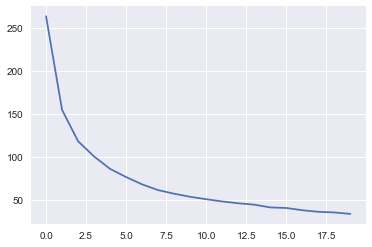

In [403]:
from sklearn.cluster import KMeans
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_lines)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [404]:
model_clus = KMeans(n_clusters = 7, max_iter=50)
model_clus.fit(pca_lines)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [405]:
model_clus.labels_

array([1, 1, 6, 2, 6, 1, 1, 1, 5, 4, 4, 3, 6, 6, 6, 5, 4, 1, 6, 1, 3, 5,
       2, 6, 6, 1, 5, 3, 4, 3, 6, 5, 3, 2, 5, 1, 3, 4, 4, 2, 2, 3, 4, 4,
       1, 4, 4, 6, 1, 4, 0, 1, 3, 4, 3, 5, 4, 4, 3, 1, 1, 6, 1, 4, 0, 4,
       1, 6, 0, 5, 2, 6, 0, 2, 1, 2, 0, 4, 5, 5, 5, 4, 1, 3, 1, 6, 4, 2,
       0, 2, 5, 0, 6, 2, 4, 5, 1, 5, 5, 0, 6, 4, 1, 2, 3, 3, 4, 4, 1, 1,
       3, 4, 2, 3, 3, 5, 5, 5, 2, 0, 3, 5, 5, 1, 2, 2, 2, 6, 1, 3, 0, 5,
       3, 5, 5, 5, 1, 1, 3, 5, 3, 3, 3, 0, 3, 6, 5, 5, 0, 3, 3, 5, 3, 1,
       5, 4, 4, 3, 1, 4, 1, 3, 3, 4, 1, 6, 1, 5, 5, 5, 4, 4, 1, 4, 5, 1,
       2, 3, 3, 0, 1, 6, 4, 6, 5, 5, 5, 0, 4, 4, 2, 3, 5, 1, 5, 2, 2, 1,
       0, 5, 4, 4, 6, 5, 5, 4, 5, 1, 1, 4, 3, 6, 5, 1, 4, 4, 4, 3, 4, 5,
       3, 1, 0, 0, 5, 3, 3, 5, 5, 0, 2, 1, 3, 5, 2, 5, 5, 2, 5, 2, 2, 3,
       3, 3, 1, 4, 5, 3, 3, 0, 5, 6, 0, 6, 6, 3, 5, 0, 2, 3, 5, 0, 3, 0,
       4, 6, 4, 2, 4, 3, 0, 5, 1, 2, 5, 5, 2, 0, 0, 1, 5, 1, 2, 2, 2, 3,
       5, 2, 3, 3, 5, 5, 0, 4, 3, 5, 3, 1, 1, 5, 1,